In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# MNIST dataset
- MNIST is a collection of handwritten digits ranging from the number 0 to 9.
- It has a training set of 42.000 images and 28.000 test images that are classified into corresponding categories or labels.

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Target variable
y = train.pop("label")

In [4]:
# scale the input values to type float32 and (normalize) the input values within the interval [0, 1]

train = train.astype('float32')/255
test = test.astype('float32')/255
y = y.astype('float32')

In [5]:
# Converting pandas Dataframe to numpy array

train = pd.DataFrame.to_numpy(train)
test = pd.DataFrame.to_numpy(test)

In [6]:
# Splitting training set into train and dev set 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((28140, 784), (13860, 784), (28140,), (13860,))

In [8]:
# Y variable has 10 different classes. Therefore we need to represent each values in y as vector. 
# This converst for example  1 to [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.] vector. 

from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)

y_test = to_categorical(y_test, num_classes=10)

Using TensorFlow backend.


In [9]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((28140, 784), (13860, 784), (28140, 10), (13860, 10))

# Model with function and KERAS

6.1 Sequential class in Keras 
- The main data structure in Keras is the Sequential class, which allows the creation of a basic neural network. The Sequential class of the Keras library is a wrapper for the sequential neural network model that Keras offers and can be created in the following way:

- The model in Keras is considered as a sequence of layers and each of them gradually “distills” the input data to obtain the desired output. In Keras, we can add the required types of layers through the .add() method.

https://www.kaggle.com/prashant111/comprehensive-guide-to-ann-with-keras

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation


model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

#### First layer
-We explicitly express in the input_shape argument of the first layer what the input data is like: a tensor that indicates that we have 784 features of the model.

-The tensor is being defined is (None, 784,).

#### Second layer
-The second layer is a softmax layer of 10 neurons, which means that it will return a matrix of 10 probability values representing the 10 possible digits.

-Each value will be the probability that the image of the current digit belongs to each one of them.

### Available activations

- tf.keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0)
- tf.keras.activations.sigmoid(x)
- tf.keras.activations.softmax(x, axis=-1)
- tf.keras.activations.softplus(x)
- tf.keras.activations.softsign(x)
- tf.keras.activations.tanh(x)
- tf.keras.activations.selu(x)
- tf.keras.activations.elu(x, alpha=1.0)
- tf.keras.activations.exponential(x)
- tf.keras.layers.LeakyReLU(alpha=0.3, **kwargs)
- tf.keras.layers.PReLU(alpha_initializer="zeros",alpha_regularizer=None,alpha_constraint=None,shared_axes=None,**kwargs)
- tf.keras.layers.ThresholdedReLU(theta=1.0, **kwargs)

In [11]:
model.summary() # Keras provides a very useful method to check the architecture of the model.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


- For our simple example, we see that it indicates that 7,960 parameters are required (column Param #), which correspond to 7850 parameters to the first layer and 110 to the second.
- In the first layer, for each neuron i (between 0 and 9) we require 784 parameters for the weights wij and therefore 10×784=7840 parameters to store the weights of the 10 neurons.
- Also, 10 additional parameters for the 10 bj biases corresponding to each one of them is required.
- So, for the first layer we require 7840 + 10 = 7850 parameters.

- In the second layer, being a softmax function, it is required to connect all 10 neurons with the 10 neurons of the previous layer.
- Therefore 10x10=100 wi parameters are required and in addition 10 bj biases corresponding to each node is required.
- So, we require 100 + 10 = 110 parameters for the second layer.

In [12]:
model.compile(loss="categorical_crossentropy", # Computes the crossentropy loss between the labels and predictions.
              optimizer="sgd",
              metrics = ['accuracy']) # Calculates how often predictions equals labels.

### Compile model with compile() method
- Starting with the Sequential model, we can define the layers in a simple way with the add() method.

- The next step is to compile the model with the compile() method, with which we can specify some properties through method arguments which are as follows:

Loss Function (https://keras.io/api/losses/)
- The first argument is the loss function.

- We will use it to evaluate the degree of error between calculated outputs and the desired outputs of the training data.

Optimizer (https://keras.io/api/optimizers/)
- The second argument is the optimizer.

- It is the way we have to specify the optimization algorithm that allows the neural network to calculate the weights of the parameters from the input data and the defined loss function.

Metrics (https://keras.io/api/metrics/)
- The third argument is the metrics.

- We must indicate the metric that we will use to monitor the learning process and test of our neural network.

In [13]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

# The batch_size argument indicates the number of data that we will use for each update of the model parameters.

# The epochs argument indicate the number of times we will use all the data in the learning process.


Epoch 1/10
28140/28140 [==============================] - 2s 54us/step - loss: 2.2645 - accuracy: 0.1249
Epoch 2/10
28140/28140 [==============================] - 1s 32us/step - loss: 2.1059 - accuracy: 0.4167
Epoch 3/10
28140/28140 [==============================] - 1s 31us/step - loss: 1.9760 - accuracy: 0.5596
Epoch 4/10
28140/28140 [==============================] - 1s 31us/step - loss: 1.8533 - accuracy: 0.6095
Epoch 5/10
28140/28140 [==============================] - 1s 33us/step - loss: 1.7378 - accuracy: 0.6456
Epoch 6/10
28140/28140 [==============================] - 1s 39us/step - loss: 1.6299 - accuracy: 0.6719
Epoch 7/10
28140/28140 [==============================] - 1s 42us/step - loss: 1.5304 - accuracy: 0.6954
Epoch 8/10
28140/28140 [==============================] - 1s 32us/step - loss: 1.4396 - accuracy: 0.7147
Epoch 9/10
28140/28140 [==============================] - 1s 34us/step - loss: 1.3572 - accuracy: 0.7314
Epoch 10/10
28140/28140 [=============================

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)

# The model can now be evaluated with the evaluate() method as follows:

13860/13860 [==============================] - 1s 54us/step


In [15]:
print('Test accuracy:', round(test_acc,4))

Test accuracy: 0.7543


#### Confusion-matrix

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

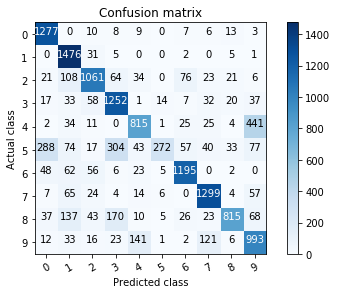

In [17]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

- In this case, the elements of the diagonal represent the number of points in which the label predicted by the model coincides with the actual value of the label, while the other values indicate the cases in which the model has classified incorrectly.

- Therefore, the higher the values of the diagonal, the better the prediction will be.

- If we calculate the sum of the values of the diagonal divided by the total values of the matrix, we get the same accuracy that the evaluate() method has returned.

In [18]:
predictions = model.predict(x_test)

- The predict() method return a vector with the predictions for the whole dataset elements.
- We know which class gives the most probability of belonging by means of the argmax function of Numpy, which returns the index of the position that contains the highest value of the vector.

In [19]:
np.argmax(predictions[11])

3

In [20]:
print(predictions[11])

[0.1357197  0.06231341 0.10343719 0.33734652 0.03020793 0.13135026
 0.0646946  0.01855368 0.08367935 0.03269728]


- We see that the highest value in the vector is in the position 3.

- We can also verify that the result of the prediction is a vector whose sum of all its components is equal to 1, as expected.

In [21]:
np.sum(predictions[11])

0.99999994

## Try some different combination

### 1) Activation Functions (sigmoid, tanh, relu)

In [ ]:
activations = ['sigmoid', 'tanh', 'relu']

for activation in activations:

    model = Sequential()
    model.add(Dense(10, activation=activation, input_shape=(784,)))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss="categorical_crossentropy", # Computes the crossentropy loss between the labels and predictions.
                  optimizer="adam",
                  metrics = ['accuracy']) # Calculates how often predictions equals labels.

    model.fit(x_train, y_train, batch_size=100, epochs=10, verbose = 0)

    train_loss, train_acc = model.evaluate(x_train, y_train)
    print(activation, 'Train accuracy:', round(train_acc,4))

    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(activation, 'Test accuracy:', round(test_acc,4))

- We can see that 'sigmoid' is low accuracy so we use generally sigmoid function in dropout when there is one class, 
- tanh and relu scores are very close

### 2) Compare Node

In [ ]:
nodes = [10,50,100]

for node in nodes:

    model = Sequential()
    model.add(Dense(node, activation='relu', input_shape=(784,)))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss="categorical_crossentropy", # Computes the crossentropy loss between the labels and predictions.
                  optimizer="adam",
                  metrics = ['accuracy']) # Calculates how often predictions equals labels.

    model.fit(x_train, y_train, batch_size=100, epochs=10, verbose = 0)

    train_loss, train_acc = model.evaluate(x_train, y_train)
    print('node number:', node, 'Train accuracy:', round(train_acc,4))

    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('node number:', node, 'Test accuracy:', round(test_acc,4))

- When increase node number, accuracy is increasing but there is a limit, we have to find it

### 3) Compare Layer Number

In [ ]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.compile(loss="categorical_crossentropy", # Computes the crossentropy loss between the labels and predictions.
              optimizer="adam",
              metrics = ['accuracy']) # Calculates how often predictions equals labels.

model.fit(x_train, y_train, batch_size=100, epochs=10, verbose = 0)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('One hidden layer Train accuracy:', round(train_acc,4))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('One hidden layer Test accuracy:', round(test_acc,4))

In [ ]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", # Computes the crossentropy loss between the labels and predictions.
              optimizer="adam",
              metrics = ['accuracy']) # Calculates how often predictions equals labels.

model.fit(x_train, y_train, batch_size=100, epochs=10, verbose = 0)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Two hidden layer Train accuracy:', round(train_acc,4))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Two hidden layer Test accuracy:', round(test_acc,4))

In [ ]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", # Computes the crossentropy loss between the labels and predictions.
              optimizer="adam",
              metrics = ['accuracy']) # Calculates how often predictions equals labels.

model.fit(x_train, y_train, batch_size=100, epochs=10, verbose = 0)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Three hidden layer Train accuracy:', round(train_acc,4))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Three hidden layer Test accuracy:', round(test_acc,4))

- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data.

### 4) Optimizer (SGD, RMSprop, Adam)

In Stochastic Gradient Descent, you use only 1 training example before updating the gradients. When the training set is large, SGD can be faster. But the parameters will "oscillate" toward the minimum rather than converge smoothly. 

The difference between gradient descent, mini-batch gradient descent and stochastic gradient descent is the number of examples you use to perform one update step.

Because mini-batch gradient descent makes a parameter update after seeing just a subset of examples, the direction of the update has some variance, and so the path taken by mini-batch gradient descent will "oscillate" toward convergence. Using momentum can reduce these oscillations.

Adam is one of the most effective optimization algorithms for training neural networks. It combines ideas from RMSProp and Momentum.

Momentum usually helps, but given the small learning rate and the simplistic dataset, its impact is almost negligeable. Also, the huge oscillations you see in the cost come from the fact that some minibatches are more difficult thans others for the optimization algorithm.

Adam on the other hand, clearly outperforms mini-batch gradient descent and Momentum. If you run the model for more epochs on this simple dataset, all three methods will lead to very good results. However, you've seen that Adam converges a lot faster.

Some advantages of Adam include:

Relatively low memory requirements (though higher than gradient descent and gradient descent with momentum)
Usually works well even with little tuning of hyperparameters

In [ ]:
optimizers = ['SGD', 'RMSprop', 'Adam']

for optimizer in optimizers:

    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(784,)))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss="categorical_crossentropy", # Computes the crossentropy loss between the labels and predictions.
                  optimizer=optimizer,
                  metrics = ['accuracy']) # Calculates how often predictions equals labels.

    model.fit(x_train, y_train, batch_size=100, epochs=10, verbose = 0)

    train_loss, train_acc = model.evaluate(x_train, y_train)
    print(optimizer, 'Train accuracy:', round(train_acc,4))

    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(optimizer, 'Test accuracy:', round(test_acc,4))

- SGD is very low but RMSprop and ADAM are better

### 5) Batch Size

In [ ]:
batch_sizes = [16, 32, 64, 128, 256]

for batch_size in batch_sizes:

    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(784,)))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss="categorical_crossentropy", # Computes the crossentropy loss between the labels and predictions.
                  optimizer='Adam',
                  metrics = ['accuracy']) # Calculates how often predictions equals labels.

    model.fit(x_train, y_train, batch_size=batch_size, epochs=10, verbose = 0)

    train_loss, train_acc = model.evaluate(x_train, y_train)
    print('batch_size:', batch_size, 'Train accuracy:', round(train_acc,4))

    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('batch_size:', batch_size, 'Test accuracy:', round(test_acc,4))

### 6) Epochs

In [ ]:
epochs = [10, 50, 100]

for epochs in epochs:

    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(784,)))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss="categorical_crossentropy", # Computes the crossentropy loss between the labels and predictions.
                  optimizer='Adam',
                  metrics = ['accuracy']) # Calculates how often predictions equals labels.

    model.fit(x_train, y_train, batch_size=100, epochs=epochs, verbose = 0)

    train_loss, train_acc = model.evaluate(x_train, y_train)
    print('epochs:', epochs, 'Train accuracy:', round(train_acc,4))

    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('epochs:', epochs, 'Test accuracy:', round(test_acc,4))

### 7) Learning Rate

In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$ determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the learning_rates variable to contain, and see what happens.

In [ ]:
# Default value is 0.001

tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
    **kwargs
)

In [ ]:
from keras.optimizers import adam

learning_rates = [0.01, 0.001, 0.0001]

for learning_rate in learning_rates:

    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(784,)))
    model.add(Dense(10, activation='softmax'))

    #opt = keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(loss="categorical_crossentropy", # Computes the crossentropy loss between the labels and predictions.
                  optimizer=adam(lr = learning_rate),
                  metrics = ['accuracy']) # Calculates how often predictions equals labels.

    model.fit(x_train, y_train, batch_size=100, epochs=epochs, verbose = 0)

    train_loss, train_acc = model.evaluate(x_train, y_train)
    print('learning_rate:', learning_rate, 'Train accuracy:', round(train_acc,4))

    test_loss, test_acc = model.evaluate(x_test, y_test)
    print('learning_rate:', learning_rate, 'Test accuracy:', round(test_acc,4))

- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost).
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you:
    -Choose the learning rate that better minimizes the cost function.
    -If your model overfits, use other techniques to reduce overfitting.

### 8) Usage of initializers

- Training your neural network requires specifying an initial value of the weights. A well chosen initialization method will help learning.
- A well chosen initialization can: Speed up the convergence of gradient descent. Increase the odds of gradient descent converging to a lower training (and generalization) error
- Zeros initialization
- Random initialization
- He initialization

- Initializers define the way to set the initial random weights of Keras layers.

### 9) Regularization

Deep Learning models have so much flexibility and capacity that overfitting can be a serious problem, if the training dataset is not big enough. Sure it does well on the training set, but the learned network doesn't generalize to new examples that it has never seen!

in regularization mode -- by setting the lambd input to a non-zero value. We use "lambd" instead of "lambda" because "lambda" is a reserved keyword in Python.
in dropout mode -- by setting the keep_prob to a value less than one

Finally, dropout is a widely used regularization technique that is specific to deep learning. It randomly shuts down some neurons in each iteration.

When you shut some neurons down, you actually modify your model. The idea behind drop-out is that at each iteration, you train a different model that uses only a subset of your neurons. With dropout, your neurons thus become less sensitive to the activation of one other specific neuron, because that other neuron might be shut down at any time.

In [ ]:
from tensorflow.keras import regularizers

model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(784,)))
layers.Dropout(0.5),
model.add(Dense(20, activation='relu', ))
layers.Dropout(0.5),
model.add(Dense(20, activation='relu', ))
layers.Dropout(0.5),
model.add(Dense(20, activation='relu', ))
layers.Dropout(0.5),
model.add(Dense(10, activation='softmax', activity_regularizer=tf.keras.regularizers.l2(0.5)))

model.compile(loss="categorical_crossentropy", # Computes the crossentropy loss between the labels and predictions.
              optimizer=adam(lr = 0.001),
              metrics = ['accuracy']) # Calculates how often predictions equals labels.

model.fit(x_train, y_train, batch_size=32, epochs=30, verbose = 2)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Train accuracy:', round(train_acc,4), 'Train loss:', round(train_loss,4))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', round(test_acc,4), 'Test loss:', round(test_loss,4))

# FINAL MODEL

In [ ]:
model = Sequential()

model.add(Dense(250, activation='relu', input_shape=(784,)))

model.add(Dense(250, activation='relu'))

model.add(Dense(250, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", 
              optimizer='Adam',
              metrics = ['accuracy']) 

model.fit(x_train, y_train, batch_size=32, epochs=20, verbose = 2)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Train accuracy:', round(train_acc,4), 'Train loss:', round(train_loss,4))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', round(test_acc,4), 'Test loss:', round(test_loss,4))

In [ ]:
# Predict () yöntemi, tüm veri kümesi öğelerinin tahminlerini içeren bir vektör döndürür.
test_result = model.predict(test)

# Sonucları bir csv dosyasına kaydetmek

# Convert one-hot vector to number
results = np.argmax(test_result,axis = 1) # bu bize prediction vektöründeki en yüksek olasılığa göre ilgili y değerini verir mesela 2 ya da 3

results = pd.Series(results,name="Label")


submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("test_submission_best.csv",index=False)

In [ ]:
# Plot confusion matrix 
# Note: This code snippet for confusion-matrix is taken directly from the SKLEARN website.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))